<p>
<font size='5' face='Georgia, Arial'>IIC-2233 Apunte Programación Avanzada</font><br>
<font size='1'>&copy; 2015 Karim Pichara - Christian Pieringer. Todos los derechos reservados.</font>
</p>

## Lambda Functions

Las funciones `lambda` son una forma alternativa de definir funciones en Python.
Además de su nombre griego, no hay nada intimidante en ellas.
Veamos un ejemplo.

In [2]:
sumar_uno = lambda x: x+1

#es (casi) equivalente a

def sumar_uno(x):
    return x+1

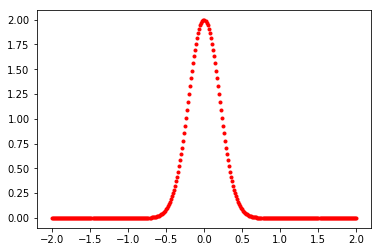

In [3]:
#para que el gráfico se genere dentro del notebook y no en una ventana aparte
%matplotlib inline 

import numpy as np
from matplotlib import pyplot as plt

gauss = lambda x, mu, sigma: (1./(np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5*((x - mu)/sigma)**2)

mu = 0.
sigma = 0.2
x = np.linspace(-2,2,300)
plt.plot(x, gauss(x, mu, sigma), '.r')
plt.show()



Sin embargo, las funciones `lambda` pueden, **además**, ser definidas de forma anónima; es decir, funciones que no tienen nombre.
Estas funciones pueden ser vistas como _fugaces_ y son utilizadas únicamente donde fueron creadas.
Esta anonimidad se combina bien con las funciones que veremos a continuación: `map`, `filter`, `reduce`.

## `map`

`map` recibe como parámetros una función y al menos un iterable. Retorna un generador que resulta de aplicar de la función sobre el iterable. `map(f, iterable)` es equivalente a `(f(x) for x in iterable)`

La cantidad de iterables entregada a `map` debe corresponder con la cantidad de parámetros que recible la función `f`. Por ejemplo, 
`map(f, iterable1, iterable2)` es equivalente a `(f(x) for x in zip(iterable1, iterable2))`

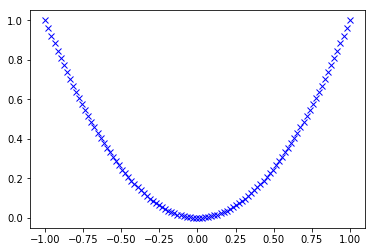

In [5]:
pow2 = lambda x : x**2
t = np.linspace(-1.,1., 100)#crea un arreglo numpy de 100 elementos, partiendo desde -1 y llegando a 1
plt.plot(t, list(map(pow2, t)), 'xb')
plt.show()

Map puede ser aplicado también en más de una lista:

In [6]:
a = [1, 2, 3, 4]
b = [17, 12, 11, 10]
c = [-1, -4, 5, 9]

c1 = list(map(lambda x, y: x + y, a, b))

c2 = list(map(lambda x, y, z: x + y + z, a, b, c))

c3 = list(map(lambda x, y, z: 2.5*x + 2*y - z, a, b, c))

print(c1)
print(c2)
print(c3)


[18, 14, 14, 14]
[17, 10, 19, 23]
[37.5, 33.0, 24.5, 21.0]


## `filter`   

`filter(f, secuencia)` retorna el resultado de aplicar la función `f` a `secuencia`, dejando fuera los datos en que el resultado de aplicar `f` al elemento fue `False`. La función `f` **debe** retornar un valor de tipo booleano.

In [8]:
def fibonacci():
    a,b = 0,1
    while True:
        yield b
        a, b = b, a + b

f = fibonacci() #función definida más arriba

fib = [next(f) for i in range(11)]
impares = list(filter(lambda x: x % 2 != 0, fib))
print(impares)

pares = list(filter(lambda x: x % 2 == 0, fib))
print(pares)

[1, 1, 3, 5, 13, 21, 55, 89]
[2, 8, 34]


## `reduce`

`reduce(f, [s1,s2,s3,...,sn])` retorna lo que resulta de aplicar la función `f` a la secuencia `[s1, s2, s3, ..., sn]` de la siguiente forma: `f(f(f(f(s1,s2),s3),s4),s5),...`  ![](files/1.reduce.png)

In [9]:
from functools import reduce
reduce(lambda x, y: x+y, range(1,10))

45